# Question 4  

Consider the ratio control algorithm experiment described in Section 3.8 of you textbook. The experiment was actually conducted as a randomized block design, where siz time periods were selected as the blocks, and all four ratio control algorithms were tested in each time period. The aveage cell voltage and the standard deviation of voltage (shown in parentheses) for each cell are as follows:

In [5]:
positions <- factor(rep(1:4, rep = 3))
uniformity <- c(
    2.76, 1.43, 2.34, 0.94,
    5.67, 1.70, 1.97, 1.36,
    4.49, 2.19, 1.47, 1.65
)
data <- data.frame(positions, uniformity)

**(a)** Is there a difference in the wafer positions? Use $ \alpha = 0.05$.

In [6]:
model <- aov(uniformity ~ positions, data = data)
summary(model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
positions    3 16.220   5.407    8.29 0.00775 **
Residuals    8  5.217   0.652                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**(b)** Estimate the variablility due to wafer position ($\hat \sigma_{\tau}^2$).

In [9]:
print(summary(model))
(5.407 - 0.652) / 3

            Df Sum Sq Mean Sq F value  Pr(>F)   
positions    3 16.220   5.407    8.29 0.00775 **
Residuals    8  5.217   0.652                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 1.585

The variability of the wafer position can be calculated as  
$$
\hat \sigma_{\tau}^2 = \frac{ SS_{\text{treatments}} - SS_E}{n} = \frac{5.407 - 0.652}{3} = 1.585
$$

**(c)** Estiamte the random error component ($\hat \sigma^2$).

The mean squred error is equal to the sum of the residuals, hence
$$
\hat \sigma^2 = MS_E = 0.652
$$

**(d)** Analyze the residuals from this experiment and comment on model adequacy.

We can analyize the residuals with the following plots.


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.92764, p-value = 0.3558


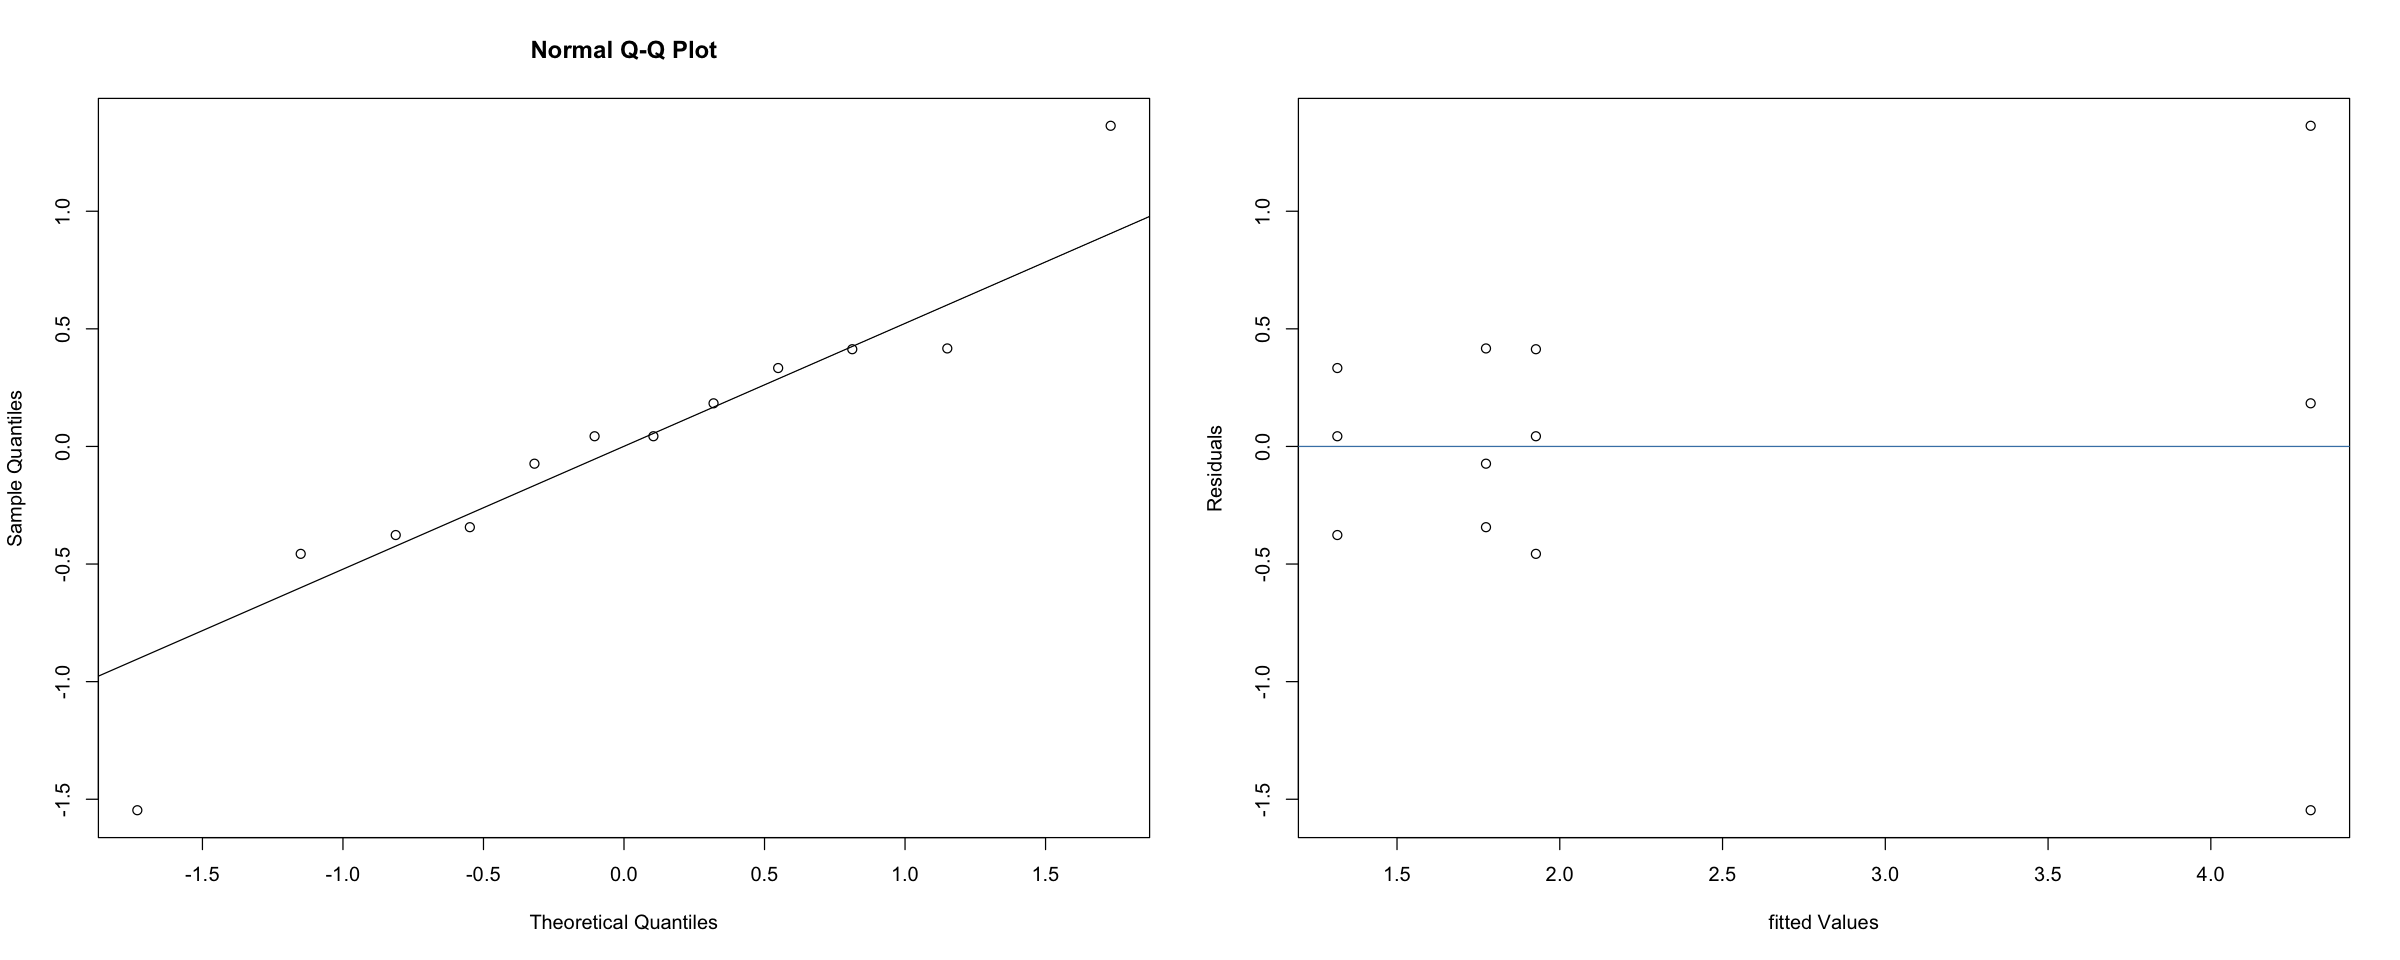

In [10]:
par(mfrow = c(1,2))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQplot
qqnorm(residuals(model))
qqline(residuals(model))
# Fitted Values versus Residuals
plot(fitted(model), residuals(model), xlab = "fitted Values", ylab = "Residuals")
abline(h=0, col= "steelblue") 

# Shapiro-Wilk
shapiro.test(residuals(model))

The QQplot doesn't show any violation to residual normality. The residual plot shows that the variance might not be constant throughout. The Shapiro-Wilk test confirms.